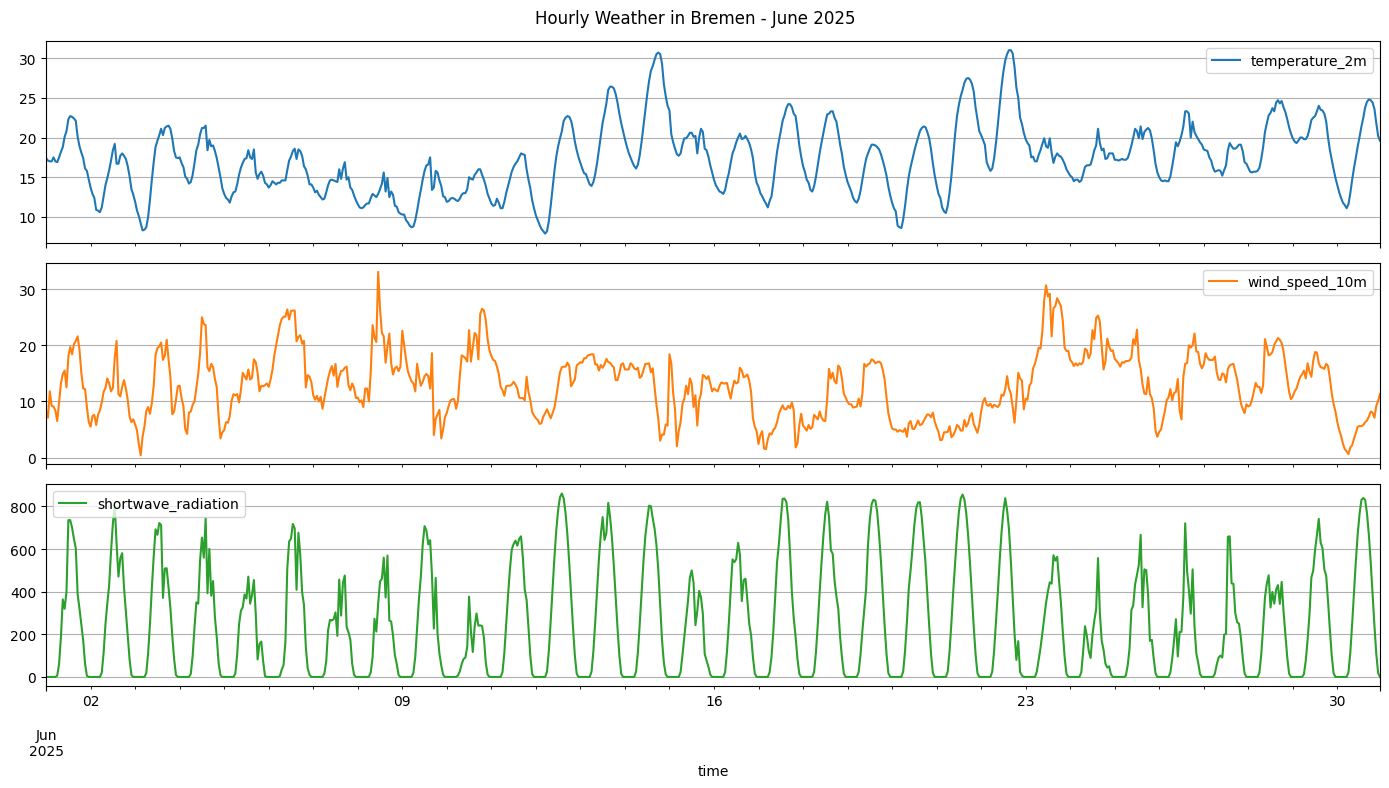

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv("../data/bremen_june_2025.csv", parse_dates=["time"], index_col="time")


df.plot(subplots=True, figsize=(14, 8), title="Hourly Weather in Bremen - June 2025", grid=True)
plt.tight_layout()
plt.show()

In [ ]:
df_daily = df.resample("D").mean()

# Drop last row (June 30) for now — use it for prediction
df_model = df_daily.iloc[:-1].copy()

In [3]:
df_model["temp_prev"] = df_model["temperature_2m"].shift(1)
df_model["wind_prev"] = df_model["wind_speed_10m"].shift(1)
df_model["radiation_prev"] = df_model["shortwave_radiation"].shift(1)

# Drop first row with NaNs from shift
df_model = df_model.dropna()

In [4]:
from sklearn.linear_model import LinearRegression

X = df_model[["temp_prev", "wind_prev", "radiation_prev"]]
y = df_model["temperature_2m"]

In [5]:
model = LinearRegression()
model.fit(X, y)

print("Model Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

Model Coefficients: [ 0.55975993 -0.04619798  0.0091568 ]
Intercept: 6.009367671202925


In [6]:
# Use June 29's values to predict June 30
X_test = df_daily.iloc[-2][["temperature_2m", "wind_speed_10m", "shortwave_radiation"]].values.reshape(1, -1)
y_actual = df_daily.iloc[-1]["temperature_2m"]

y_pred = model.predict(X_test)[0]

print(f"Predicted temperature for June 30: {y_pred:.2f}°C")
print(f"Actual temperature on June 30: {y_actual:.2f}°C")
print(f"Error: {abs(y_actual - y_pred):.2f}°C")

Predicted temperature for June 30: 19.27°C
Actual temperature on June 30: 18.22°C
Error: 1.06°C


C:\Users\DAIKiDE\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


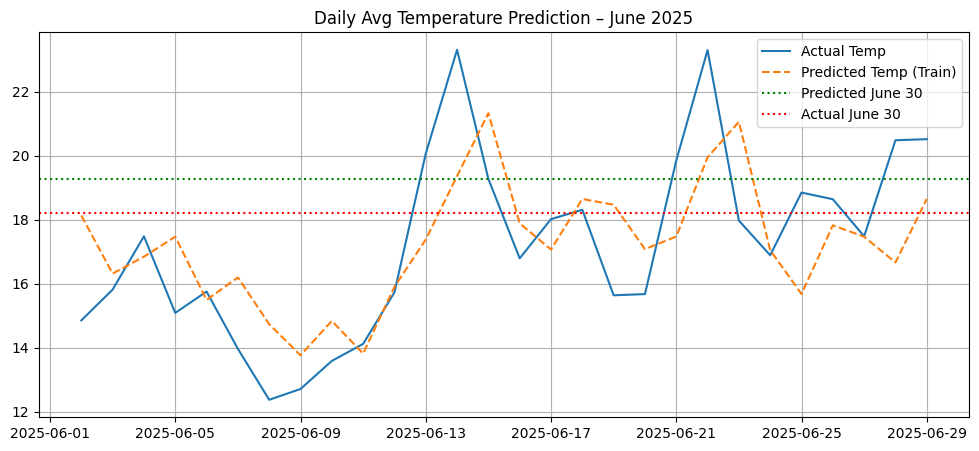

In [7]:
y_train_pred = model.predict(X)

plt.figure(figsize=(12, 5))
plt.plot(df_model.index, y, label="Actual Temp")
plt.plot(df_model.index, y_train_pred, label="Predicted Temp (Train)", linestyle="--")
plt.axhline(y=y_pred, color="green", linestyle=":", label="Predicted June 30")
plt.axhline(y=y_actual, color="red", linestyle=":", label="Actual June 30")
plt.title("Daily Avg Temperature Prediction – June 2025")
plt.legend()
plt.grid(True)
plt.show()
